In [23]:
from numpy import *
from matplotlib import pyplot as plt
import h5py
import os
results = 'C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\'

# plotting the raw measurement and background results

in all of the cells below, the measurement is the very last one printed, and the background is last background printed. the measurement corresponds to MOT4, not that this matters much which AOM is being read

the feedback is also off, so the measurement has not been affected by changing the dds amplitude

no averaging.

<BarContainer object of 8 artists>

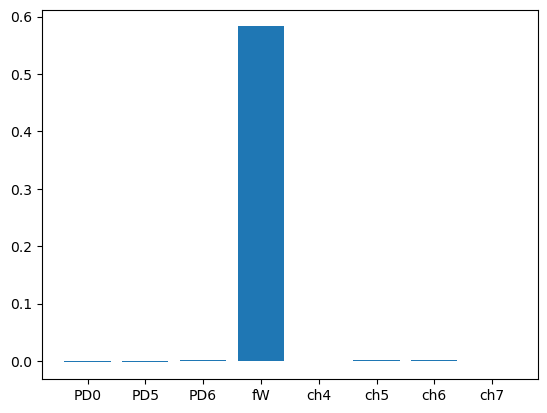

In [15]:
bg = array([0.8404541,  -0.00335693, -0.01098633,  0.01556396,  0.00457764,  0.00976562,
            0.01281738, -0.01312256])
ms = array([ 0.8380127,  -0.00457764, -0.00946045,  0.59844971,  0.00396729,  0.0112915,
            0.01434326, -0.01281738])

plt.bar(range(8), ms - bg, tick_label=['PD0','PD5','PD6','fW','ch4','ch5','ch6','ch7'])

averaging in the measurement function

In [16]:
self.measurement_array = np.full(8*self.num_samplers, 0.0)
    data_array = np.full(8, 0.0)
    for sampler in self.sampler_list:
        i = 0
        for j in range(self.averages):
            sampler.sample(data_array)
            self.measurement_array[i:i + 8] += data_array
            delay(1 * ms)
        i += 1
    self.measurement_array /= self.averages

IndentationError: unexpected indent (704472411.py, line 2)

<BarContainer object of 8 artists>

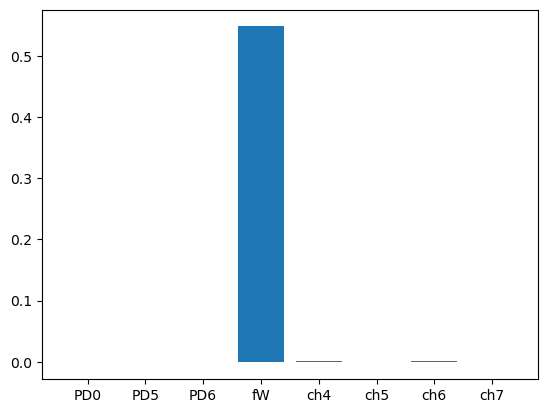

In [18]:
bg = array([ 0.79101562, -0.00335693, -0.01037598,  0.02502441,  0.00366211,  0.01068115,
           0.01556396, -0.01220703])
ms = array([ 0.78979492, -0.0038147,  -0.0100708,   0.57327271, 0.00442505,  0.01022339,
            0.01708984, -0.01266479])

plt.bar(range(8), ms - bg, tick_label=['PD0','PD5','PD6','fW','ch4','ch5','ch6','ch7'])

averaging in the measurement and background functions

In [16]:
self.measurement_array = np.full(8*self.num_samplers, 0.0)
    data_array = np.full(8, 0.0)
    for sampler in self.sampler_list:
        i = 0
        for j in range(self.averages):
            sampler.sample(data_array)
            self.measurement_array[i:i + 8] += data_array
            delay(1 * ms)
        i += 1
    self.measurement_array /= self.averages
    
self.background_array = np.full(8 * self.num_samplers, 0.0)
    data_array = np.full(8, 0.0)
    for sampler in self.sampler_list:
        i = 0
        for j in range(self.averages):
            sampler.sample(data_array)
            self.background_array[i:i + 8] += data_array
            delay(1 * ms)
        i += 1
    self.background_array /= self.averages

IndentationError: unexpected indent (704472411.py, line 2)

<BarContainer object of 8 artists>

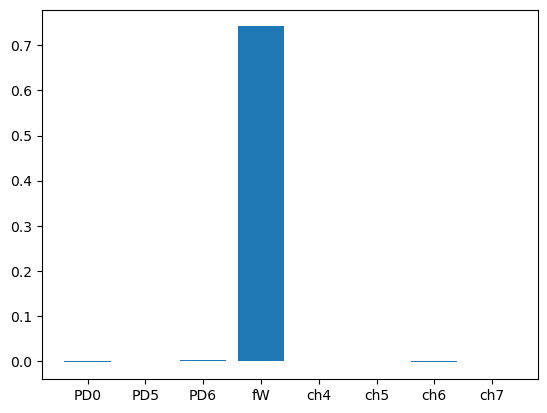

In [20]:
bg = array([1.01486206, -0.00350952, -0.01113892, -0.00595093,  0.00442505,  0.0100708,
           0.01647949, -0.01220703])
ms = array([1.01333618, -0.0038147,  -0.00946045,  0.73577881,  0.00427246,  0.00946045,
            0.01327515, -0.01281738])

plt.bar(range(8), ms - bg, tick_label=['PD0','PD5','PD6','fW','ch4','ch5','ch6','ch7'])

In [ ]:
only background averaged. same function as above.

<BarContainer object of 8 artists>

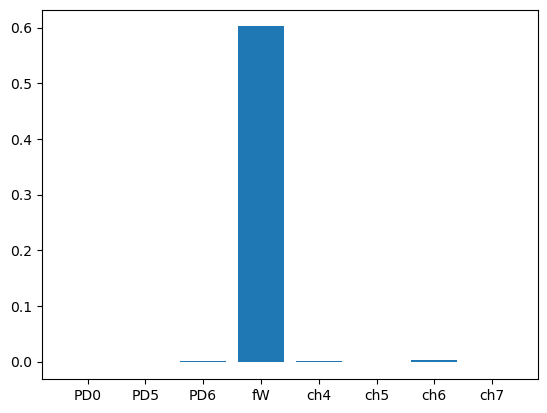

In [21]:
bg = array([ 0.85327148, -0.00411987, -0.01052856,  0.0189209,   0.00457764,  0.01159668,
            0.01480103, -0.01266479])
ms = array([ 0.85174561, -0.00396729, -0.0088501,   0.62103271,  0.00579834,  0.0100708,
             0.01739502, -0.01403809])

plt.bar(range(8), ms - bg, tick_label=['PD0','PD5','PD6','fW','ch4','ch5','ch6','ch7'])

# plotting the dataset results
this shows more clearly the results of including vs not including averages

### comparison between data without subtracting the background. 
this assumes that the background will not appreciably change, which is probably true with a bandpass filter,
but it is a bandaid fix.

even with the background calls removed, the unexpected behavior persists. after refactoring my averaging code in the measure function, all is well. 

### comparison between averaging and not
there was an issue where the cooling dds was being put into a weird state but i don't think that affected this data. 

no averaging

In [97]:
f = h5py.File(os.path.join(results, '2023-08-29\\15\\000004604-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

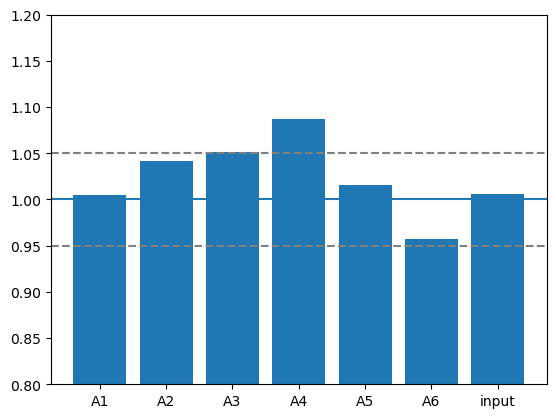

In [98]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

averaging background only

In [104]:
f = h5py.File(os.path.join(results, '2023-08-29\\15\\000004607-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

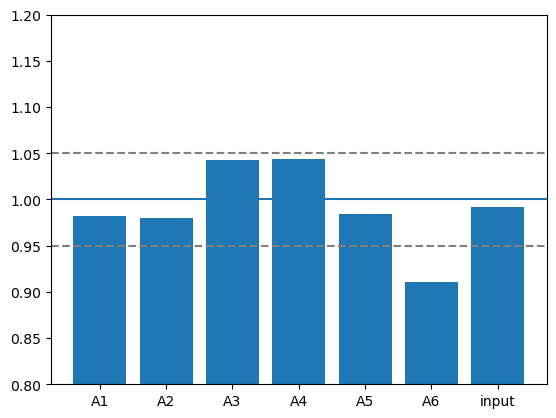

In [105]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

In [108]:
f = h5py.File(os.path.join(results, '2023-08-29\\15\\000004608-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

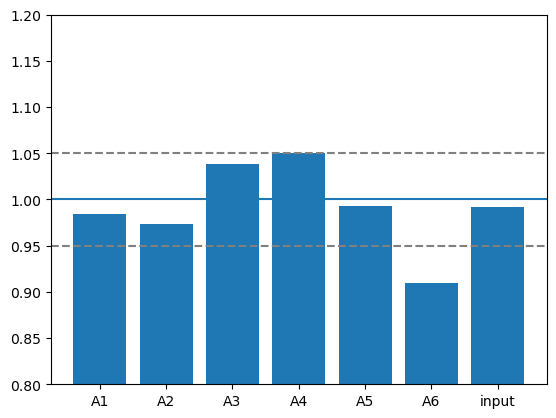

In [109]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

averaging background and measurement

In [110]:
f = h5py.File(os.path.join(results, '2023-08-29\\15\\000004609-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

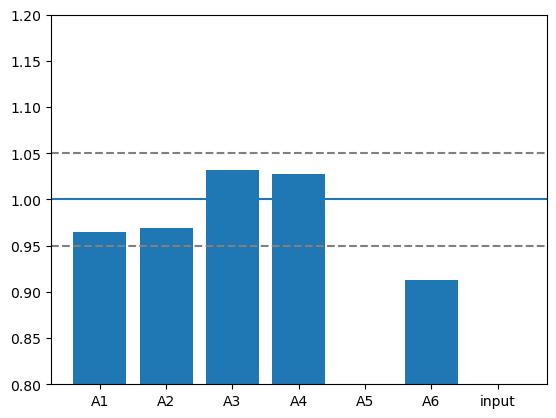

In [111]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

In [112]:
f = h5py.File(os.path.join(results, '2023-08-29\\15\\000004610-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

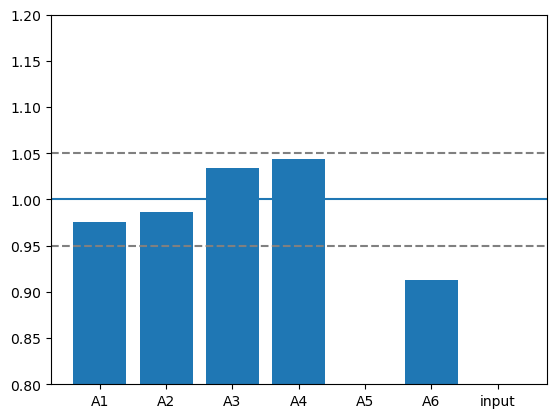

In [113]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

averaging both, but try resetting the buffer to 0s in the fucntion

In [131]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004611-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

In [129]:
last_pts = [x[-1] for x in MOTdata]

In [130]:
last_pts

[1.0, 100]

In [128]:
f['datasets'].keys()

<KeysViewHDF5 ['MOT1_monitor', 'MOT2_monitor', 'MOT3_monitor', 'MOT4_monitor', 'MOT5_monitor', 'MOT6_monitor', 'MOT_switchyard_monitor', 'monitor_pts']>

(0.8, 1.2)

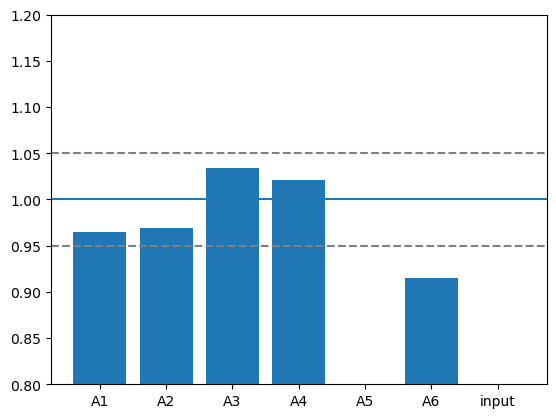

In [125]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

maybe the issue is timing, in which case by changing the order of the dds channels in the stabilizer dict i should be able to flip which of the channels gets tanked above

(0.8, 1.2)

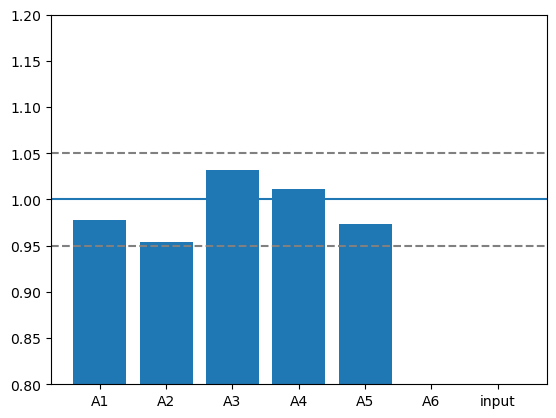

In [135]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004614-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

(0.8, 1.2)

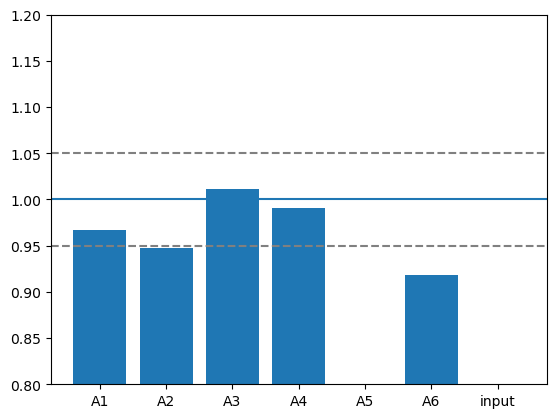

In [134]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004615-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

ha! it's about timing... or at least about the order. why are successive measurements not corrupted by the previous one?
or maybe they are but it's almost impossible to tell when the process values are close to where we want them. 
add a long delay between background and measurement to test this. another possibility is that I have an indexing error...

let the cooling DP be the control, and put a 100 ms delay between getting the background and correcting the series channels.

(0.8, 1.2)

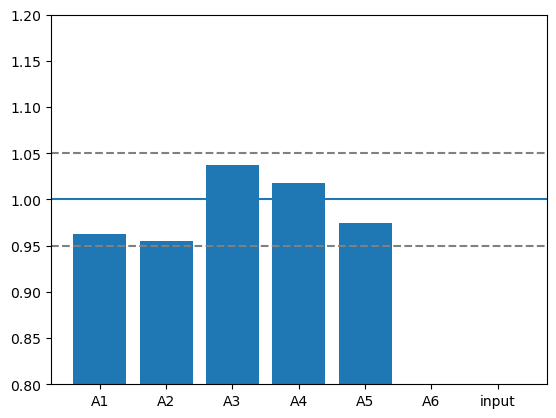

In [137]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004616-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

no difference. try 500 ms to be positive. woah! it flipped

(0.8, 1.2)

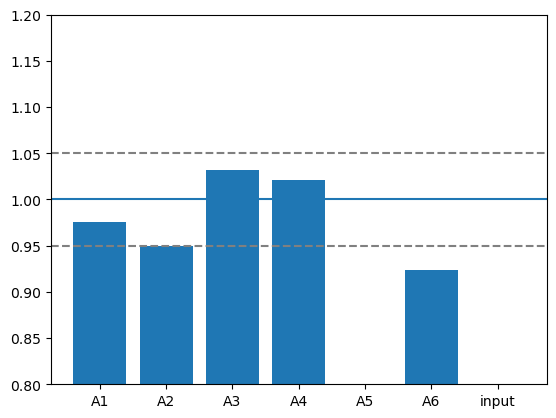

In [140]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004617-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

no difference. try 500 ms to be positive.

try again with only 100 ms. no more flip... if the flip was real and not my mistake somehow, then this can't be an indexing issue.

(0.8, 1.2)

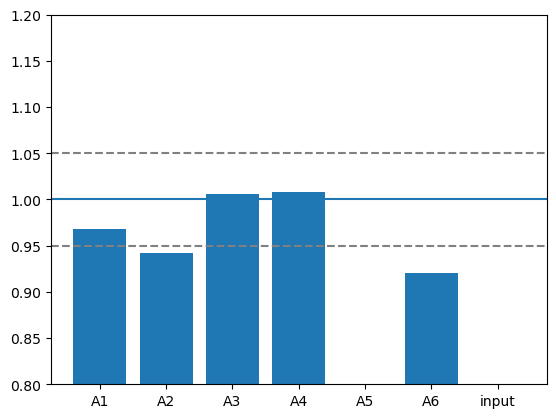

In [141]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004618-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

try copy operation by initiating a temp array

(0.8, 1.2)

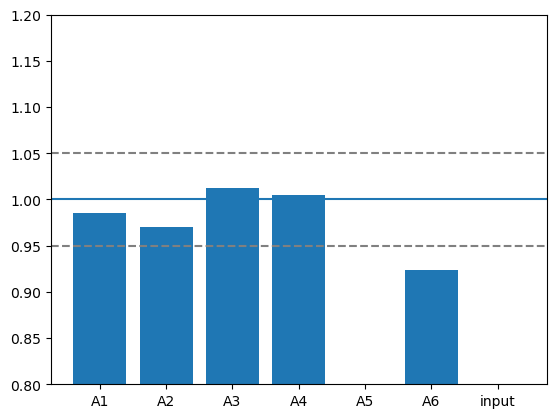

In [143]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004623-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

(0.8, 1.2)

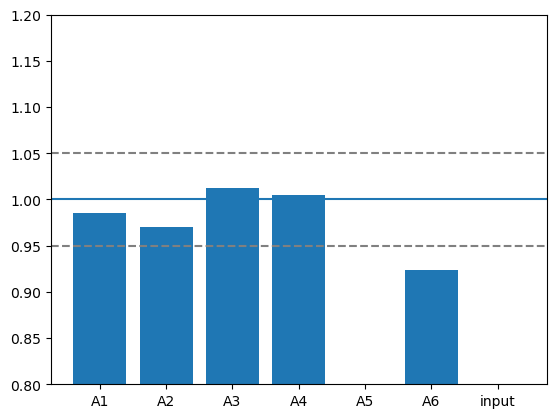

In [143]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004623-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

(0.8, 1.2)

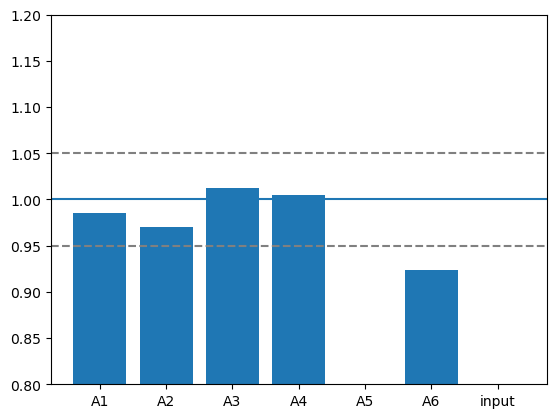

In [143]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004623-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

try the functions that i used in Sampler average. these are more simple in that there is no indexing since i 
directly reference the sampler0.

In [ ]:
self.background_array = np.full(8, 0.0) 
for i in range(self.averages):
    self.exp.sampler0.sample(self.data_array)
    self.background_array += self.data_array
    delay(1*ms)

self.background_array /= self.averages

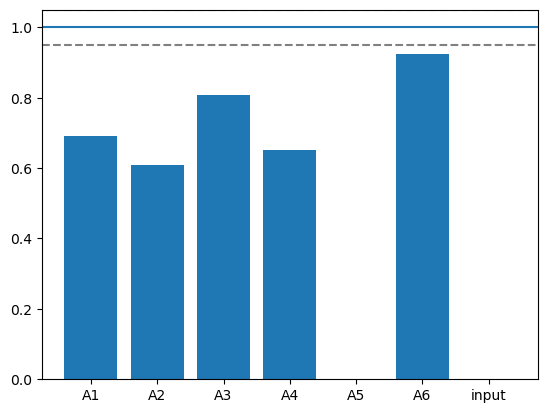

In [150]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004627-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

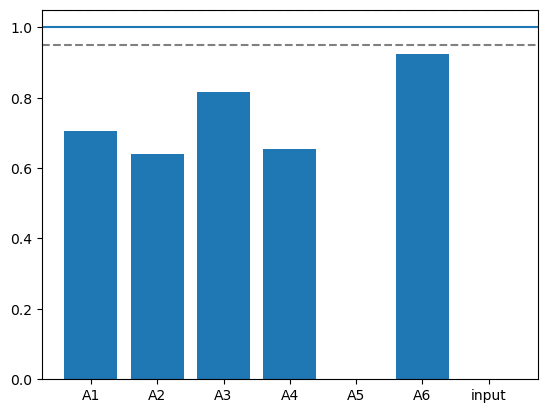

In [151]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004628-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

definitely not working, even though those functions are more simple and work in SamplerAverage. what is the significance of 
channel 0 an 1 on sampler 0, which leads to 0 valued results?

In [152]:
last_pts

[0.7047255833943685,
 0.6402057150135869,
 0.8157706160924425,
 0.6539481026785715,
 0.0,
 0.9237753378378378,
 0.0]

I've so far been setting averages = 2. as a sanity check, does everything behave normally if I use averages = 1? No. so 
this is deeper than taking an average. this is something different.

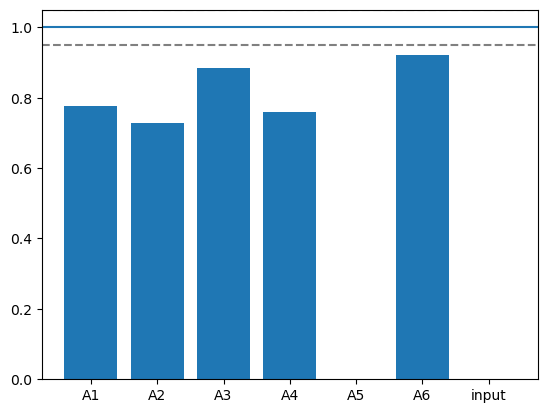

In [154]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004629-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

define separate data buffers for the signal and background

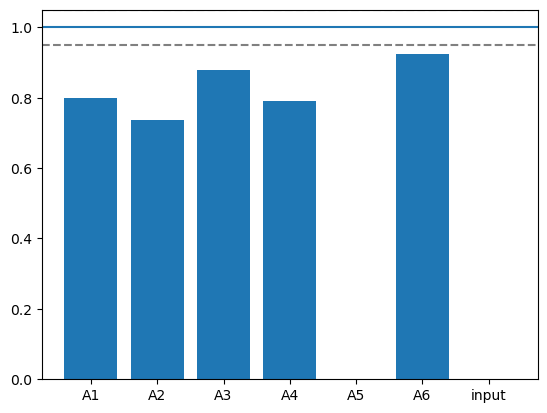

In [156]:
f = h5py.File(os.path.join(results, '2023-08-29\\16\\000004630-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

it seems like the fundamental issue is related to evaluated the sampler with one array, and storing the data on another.
i don't understand what is fundamentally different about the sampler average code and this. more research is needed

in the average loop in background, put the background buffer explicitly in the sample call instead of adding to it, with averages = 1.

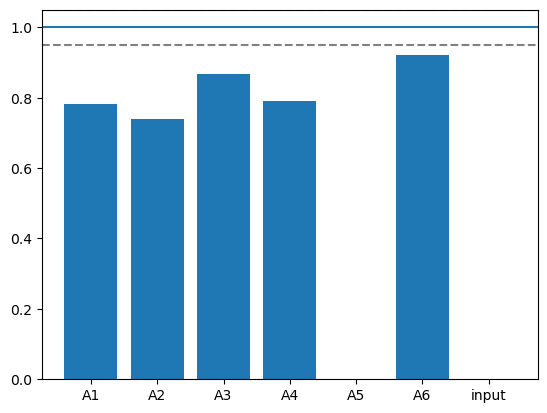

In [159]:
f = h5py.File(os.path.join(results, '2023-08-29\\19\\000004631-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

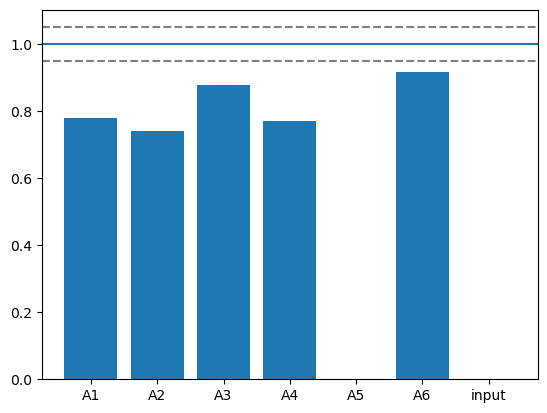

In [160]:
f = h5py.File(os.path.join(results, '2023-08-29\\19\\000004632-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

directly pass the background array. no fuss, nothing.

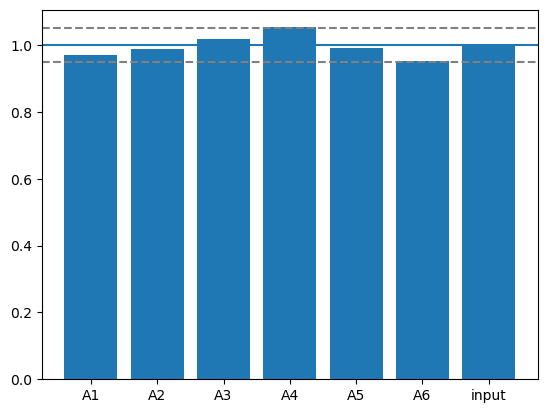

In [162]:
f = h5py.File(os.path.join(results, '2023-08-29\\19\\000004633-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

same as above but put it in a loop with averages=1

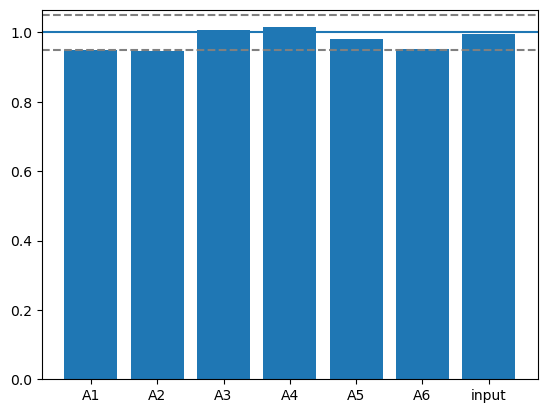

In [164]:
f = h5py.File(os.path.join(results, '2023-08-29\\19\\000004634-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

now use a different variable for the buffer, and set the background array equal to it after the loop. there we have it folks, that's what breaks the camel's back.

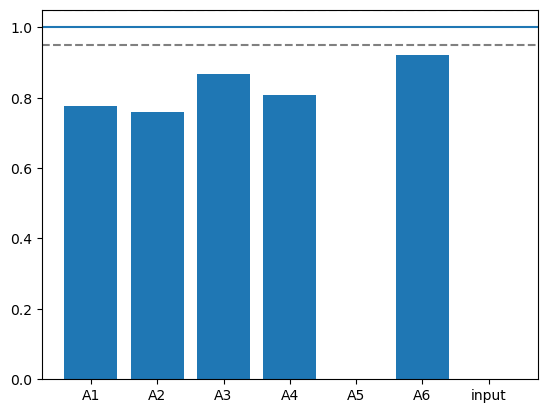

In [166]:
f = h5py.File(os.path.join(results, '2023-08-29\\19\\000004635-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

the error below speaks for itself

In [ ]:
root:While compiling <repository>\qn_artiq_routines\AOMFeedbackTest.py
<repository>\qn_artiq_routines\subroutines\aom_feedback.py:396:33-396:76: error: the assigned value does not outlive the assignment target
        self.background_array = np.full(8 * self.num_samplers, 0.0) + dummy
        ~~~~~~~~~~~~~~~~~~~~~   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
<repository>\qn_artiq_routines\subroutines\aom_feedback.py:396:9-396:30: note: the assignment target is still alive after this function returns
        self.background_array = np.full(8 * self.num_samplers, 0.0) + dummy
        ^^^^^^^^^^^^^^^^^^^^^                                              
<repository>\qn_artiq_routines\subroutines\aom_feedback.py:347:28-347:32: note: the assignment target is introduced here as a formal argument
    def measure_background(self):
                           ^^^^  
<repository>\qn_artiq_routines\subroutines\aom_feedback.py:346:5: note: the assigned value is alive from this point...
    @kernel
    ^      
<repository>\qn_artiq_routines\subroutines\aom_feedback.py:403:42: note: ... to this point
        self.print(self.background_array)
                                         ^

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (7,)  and requested shape (2,)

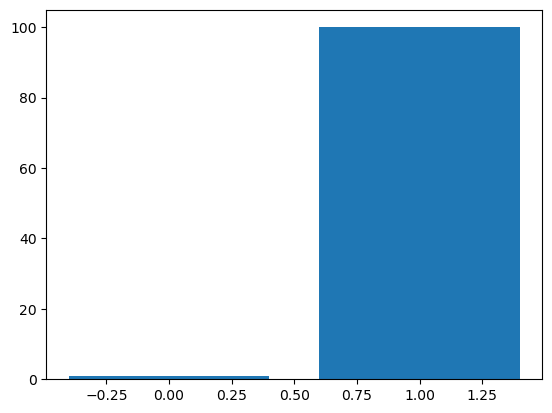

In [176]:
f = h5py.File(os.path.join(results, '2023-08-29\\20\\000004636-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
# plt.ylim((0.8,1.2))

In [169]:
averages = 3
dummy = full(8*averages, 0.0)
for i in range(averages):
    dummy[i:i+8] = ones(8)

In [179]:
for i in range(averages):
    dummy[i*8:(i+1)*8] = i*ones(8)

In [183]:
np.sum([dummy[i*8:(i+1)*8] for i in range(averages)],axis=0)/3

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
self.measurement_array = np.full(8 * self.num_samplers, 0.0)
measurement_array = np.full(8, 0.0)
for sampler in self.sampler_list:
    i = 0
    for j in range(self.averages):
        sampler.sample(measurement_array)
        self.measurement_array[i * 8:(i + 1) * 8] += measurement_array
        delay(1 * ms)
    i += 1
self.measurement_array /= self.averages

the function above doesn't work either. new approach. write a function that returns the value i want.

### comparison between averaging and not - flawed study
I found that the double pass AOM was still being adjusted in dry run mode but that issue plagued
this study.

no averaging

In [70]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004518-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

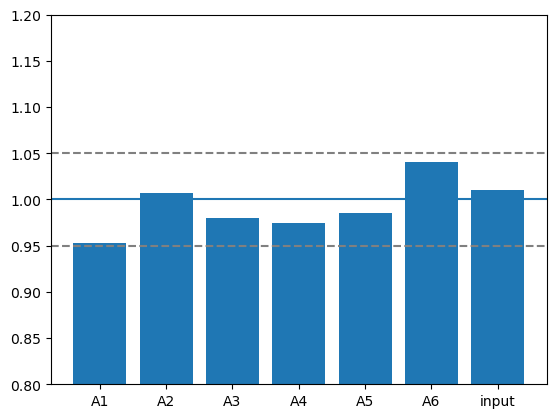

In [71]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

In [72]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004519-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

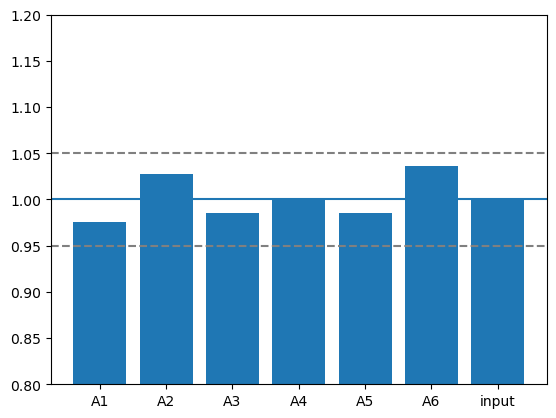

In [73]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

averaging in measurement only

In [74]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004521-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

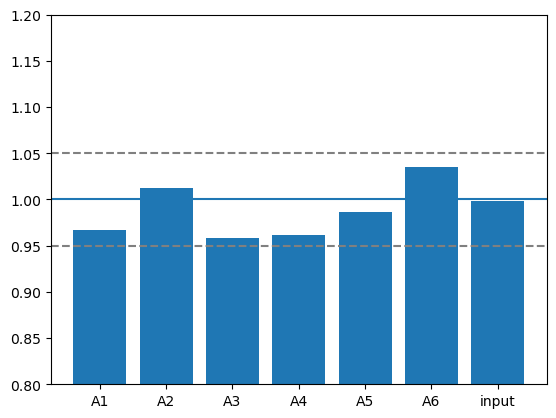

In [75]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

In [76]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004522-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.8, 1.2)

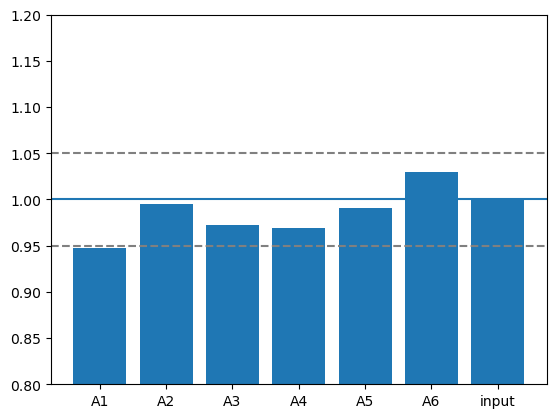

In [77]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0.8,1.2))

averaging in both measurment and background

In [78]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004523-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

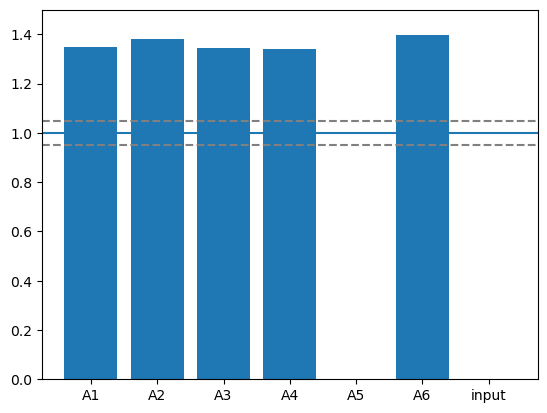

In [79]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

In [81]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004524-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

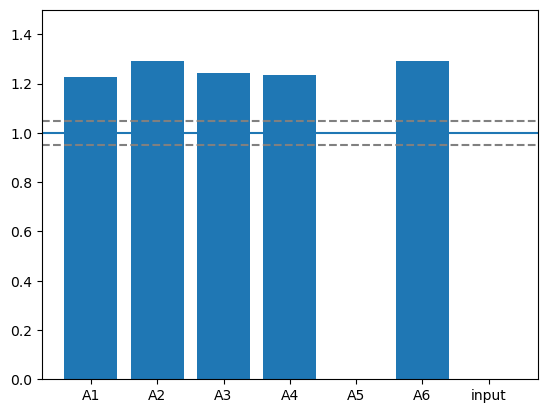

In [82]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

averaging both, but used a different variable name for the buffer array in the background function
compared to the measurement function. even though these variables should have local scope only 
(i.e. within each respective function), this causes a marked difference

In [84]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004525-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

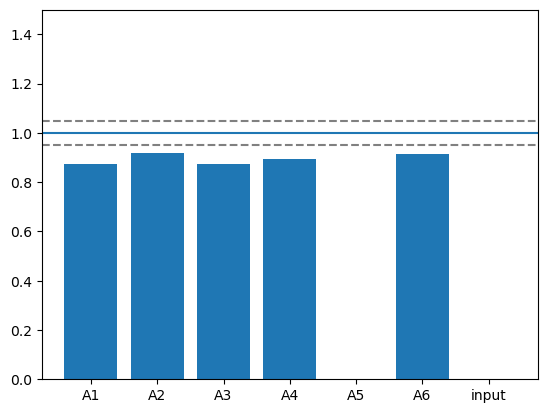

In [85]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

In [86]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004526-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

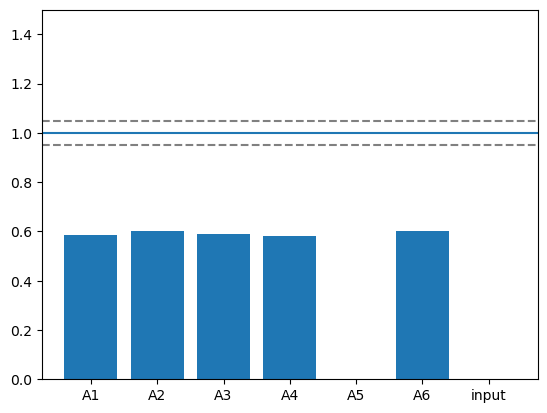

In [87]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

back to only averaging the measurment. this seems real as A5 and the input are now in a similar
range to the other values, but it is surprising that the levels have decreased so much

In [88]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004528-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

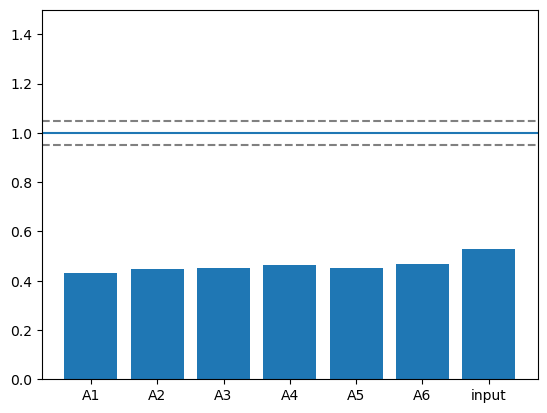

In [89]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

In [90]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004529-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

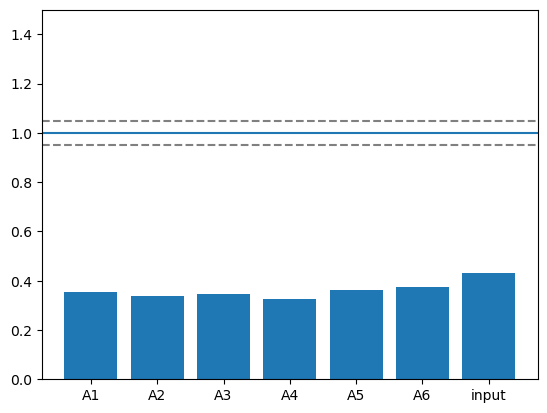

In [91]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

averaging neither. again, surprising that everything has dropped. 

In [93]:
f = h5py.File(os.path.join(results, '2023-08-29\\10\\000004530-AOMPowerStabilizerTest2.h5'))
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
last_pts = [x[-1] for x in MOTdata]

(0.0, 1.5)

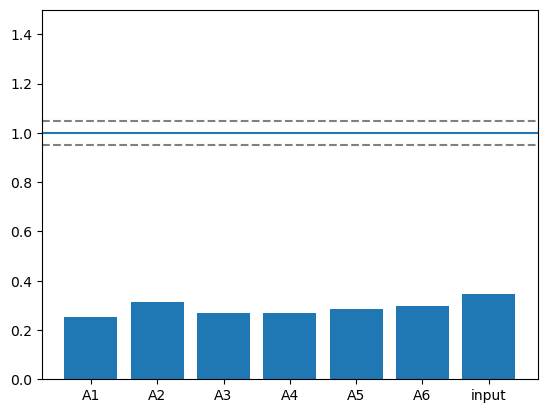

In [94]:
plt.bar(range(len(last_pts)), last_pts, tick_label=['A1','A2','A3','A4','A5','A6','input'])
plt.axhline(1)
plt.axhline(1.05,linestyle='--',color='gray')
plt.axhline(0.95,linestyle='--',color='gray')
plt.ylim((0,1.5))

I found that the double pass power had been set to 9 dB, saturating the AOM. should code in a cut-off for the maximum drive power for the AOM. but also, why was the power of the double pass being changed at all in dry run mode?